In [471]:
import numpy as np
import pandas as pd

In [597]:
from skimage.io import imread
image = imread('parrots1.jpg')

In [618]:
%matplotlib inline

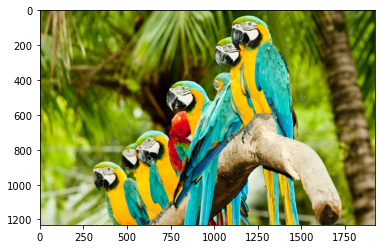

In [619]:
import pylab
pylab.imshow(image)

In [620]:
from skimage import img_as_float

In [621]:
im = img_as_float(image)

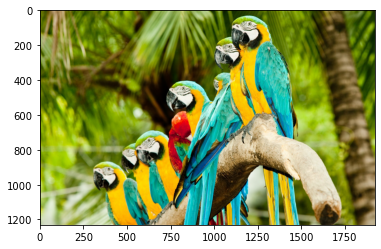

In [622]:
pylab.imshow(im)

In [623]:
im.shape

(1231, 1920, 3)

In [624]:
X = {'R' : im[::, ::, 0].reshape(-1), 'G' : im[::, ::, 1].reshape(-1), 'B' : im[::, ::, 2].reshape(-1)}

In [625]:
X = pd.DataFrame.from_dict(X)

In [626]:
X

,R,G,B
0,0.325490,0.419608,0.000000
1,0.329412,0.423529,0.000000
2,0.337255,0.431373,0.000000
3,0.349020,0.435294,0.000000
4,0.352941,0.439216,0.003922
...,...,...,...
2363515,0.721569,0.662745,0.533333
2363516,0.721569,0.662745,0.533333
2363517,0.721569,0.662745,0.533333
2363518,0.725490,0.666667,0.537255


In [627]:
from sklearn.cluster import KMeans

In [628]:
km = KMeans(init = 'k-means++', random_state = 241, n_clusters = 13)

In [629]:
X

,R,G,B
0,0.325490,0.419608,0.000000
1,0.329412,0.423529,0.000000
2,0.337255,0.431373,0.000000
3,0.349020,0.435294,0.000000
4,0.352941,0.439216,0.003922
...,...,...,...
2363515,0.721569,0.662745,0.533333
2363516,0.721569,0.662745,0.533333
2363517,0.721569,0.662745,0.533333
2363518,0.725490,0.666667,0.537255


In [630]:
km.fit(X)

KMeans(n_clusters=13, random_state=241)

In [631]:
y_pred = pd.DataFrame(km.predict(X), columns = ['cluster'])
y_pred

,cluster
0,9
1,9
2,2
3,2
4,2
...,...
2363515,3
2363516,3
2363517,3
2363518,3


In [632]:
Z = X.join(y_pred)
Z

,R,G,B,cluster
0,0.325490,0.419608,0.000000,9
1,0.329412,0.423529,0.000000,9
2,0.337255,0.431373,0.000000,2
3,0.349020,0.435294,0.000000,2
4,0.352941,0.439216,0.003922,2
...,...,...,...,...
2363515,0.721569,0.662745,0.533333,3
2363516,0.721569,0.662745,0.533333,3
2363517,0.721569,0.662745,0.533333,3
2363518,0.725490,0.666667,0.537255,3


In [633]:
clusters_names = pd.unique(Z.cluster)

In [634]:
clusters_names

array([ 9,  2,  8, 12,  3,  5,  4,  1, 10,  6,  0,  7, 11])

In [635]:
Z[Z.cluster == 3]

,R,G,B,cluster
76,0.741176,0.631373,0.478431,3
77,0.749020,0.639216,0.486275,3
78,0.756863,0.647059,0.494118,3
79,0.760784,0.650980,0.498039,3
80,0.752941,0.654902,0.498039,3
...,...,...,...,...
2363515,0.721569,0.662745,0.533333,3
2363516,0.721569,0.662745,0.533333,3
2363517,0.721569,0.662745,0.533333,3
2363518,0.725490,0.666667,0.537255,3


In [636]:
c_mean

[R          0.293044
 G          0.320095
 B          0.031308
 cluster    9.000000
 dtype: float64,
 R          0.416525
 G          0.494183
 B          0.022598
 cluster    2.000000
 dtype: float64,
 R          0.504526
 G          0.494122
 B          0.237806
 cluster    8.000000
 dtype: float64,
 R           0.648245
 G           0.691445
 B           0.350803
 cluster    12.000000
 dtype: float64,
 R          0.767957
 G          0.766360
 B          0.569852
 cluster    3.000000
 dtype: float64,
 R          0.593459
 G          0.693784
 B          0.047193
 cluster    5.000000
 dtype: float64,
 R          0.135761
 G          0.130010
 B          0.026667
 cluster    4.000000
 dtype: float64,
 R          0.053589
 G          0.460791
 B          0.460620
 cluster    1.000000
 dtype: float64,
 R           0.375948
 G           0.806367
 B           0.750711
 cluster    10.000000
 dtype: float64,
 R          0.878555
 G          0.888311
 B          0.797833
 cluster    6.000000

In [637]:
c_med = [Z[Z.cluster == i].median() for i in clusters_names]
c_mean = [Z[Z.cluster == i].mean() for i in clusters_names]

In [638]:
Z_med = Z.copy()
Z_mean = Z.copy()

In [639]:
for i in range(Z.shape[0]):
    Z_med.iloc[i] = c_med[int(Z_med.iloc[i]['cluster'])]

In [641]:
im_med = Z_med.drop(columns = 'cluster')
im_mean = Z_mean.drop(columns = 'cluster')

In [642]:
im_med = im_med.to_numpy()
im_mean = im_mean.to_numpy()

In [643]:
im_med = im_med.reshape(im.shape)
im_mean = im_mean.reshape(im.shape)

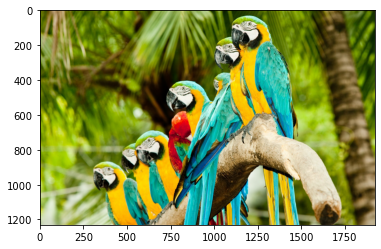

In [644]:
pylab.imshow(im)

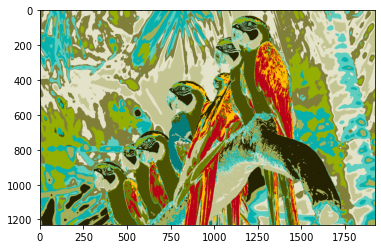

In [645]:
pylab.imshow(im_med)

In [ ]:
pylab.imshow(im_mean)

In [ ]:
from math import *

In [646]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    psnr = 20 * log10(1.0 / sqrt(mse))
    return psnr

In [647]:
print(PSNR(im, im_med))

6.2041968870936826
